# Tutorial análisis de patrones 
## Luis Fernando Torres Torres 

En el presente informe se muestra y se explica como es la metodología de cada una de las etapas que componen el análisis de patrones.

<img src="metodologia.png">

Se familiariza con cada una de las etapas, por medio de un ejercicio práctico enfocado en el procesamiento digital de señales de voz. Se implementa la primera etapa que consiste en la adquisición de los datos, luego se realiza el acondicionamiento del audio en la etapa de preprocesado para ser analizados adecuadamente, posteriormente se hace la extracción de características donde se obtienen representaciones de los datos adquiridos.

In [1]:
pip install sklearn 


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: c:\users\luis_fernando\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: c:\users\luis_fernando\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [3]:
#Librerias a usar 
import numpy as np
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar Audio
import matplotlib.pyplot as plt

#Clasificación
import sklearn 
from sklearn.decomposition import PCA #Libreria para aplicar PCA
from sklearn.preprocessing import StandardScaler # Libreria para normalizar datos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #Libreria para aplicar LDA
from sklearn.model_selection import train_test_split #Dividir los datos 
from sklearn.neighbors import KNeighborsClassifier #Libreria para vecinos cercanos 
from sklearn import svm #Maquina vectorial de soporte
from sklearn.inspection import DecisionBoundaryDisplay #Para imprimir decisión de SVM
from sklearn.model_selection import  KFold # Cross validation K-fold
from sklearn.model_selection import GridSearchCV # Malla de busqueda 
from scipy import stats as st #Para sacar la moda 

#Metricas
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix #Matriz de confusión
from sklearn.metrics import accuracy_score # Para mirar el puntaje de precisión
from sklearn.metrics import recall_score # Sensibilidad
from sklearn.metrics import precision_score #Precisión

#Scores, AUC , y ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

In [4]:
def graficar(x,y,x_label,y_label,titulo,tamanio=(10,4)):
    """
    Función para graficar datos
    inputs:
        x: Array de puntos del eje x
        y: Array de puntos del eje y
        x_label: label del eje x
        y_label: label para el eje y
        titulo: titulo de la grafica
        
    """
    plt.figure(figsize=tamanio)
    plt.plot(x,y)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.title(titulo,fontsize=16)
    plt.show()

## Pre-procesamiento

In [5]:
file_audio=('audio.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
t=np.arange(0, float(len(x)), 1.0) # Vector de tiempo sin normalizar 

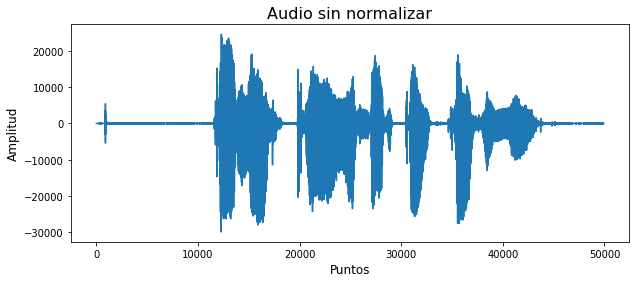

In [6]:
#Gráfica sin normalizar
graficar(t,x,"Puntos","Amplitud","Audio sin normalizar")
Audio(x, rate=fs)

In [7]:
def normalizar(fs,x):
    """
    Función para normalizar audio
    inputs:
        fs:Frecuencia de muestreo del audio
        x: Array de la señal original
    outputs:
        x: Array de la señal normalizada
        t: Array temporal normalizado
    """
    x=x-np.mean(x)
    x=x/float(max(abs(x))) # escala la amplitud de la senal 
    t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo normalizado 
    return x,t

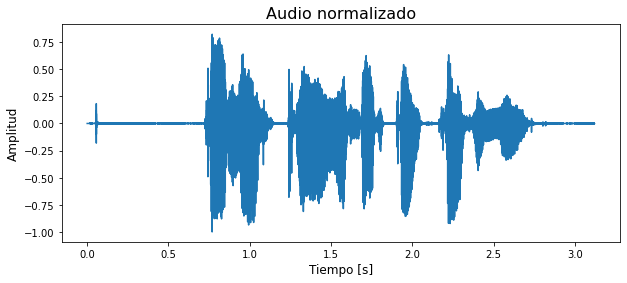

In [8]:
#Gráfica de señal normalizada
x,t=normalizar(fs,x) #Normalizar audio
graficar(t,x,"Tiempo [s]","Amplitud","Audio normalizado")
Audio(x, rate=fs)

# Extracción de características  

## Principal Component Analysis (PCA)

In [9]:
bajas=np.loadtxt("low_emotions.txt")#Cargar archivo emociones bajas
altas=np.loadtxt("high_emotions.txt")#Cargar archivo emociones altas

#Creación de etiquetas 
labels_bajas=np.zeros((bajas.shape[0],))
labels_altas=np.ones((altas.shape[0],))

print("Dimensión de bajas emociones: ",np.shape(bajas))
print("Dimensión de altas emociones: ",np.shape(altas))

Dimensión de bajas emociones:  (222, 6373)
Dimensión de altas emociones:  (313, 6373)


In [10]:
data= np.concatenate((bajas,altas))
labels_data= np.concatenate((labels_bajas,labels_altas))
print("Dimensión de mi matriz de datos:",np.shape(data))

#Normalizo datos de mi matriz 
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

Dimensión de mi matriz de datos: (535, 6373)


In [11]:
pca = PCA(n_components=2)
pca_transformado= pca.fit_transform(data)
pca_var = pca.explained_variance_ratio_
print(pca_transformado.shape)

(535, 2)


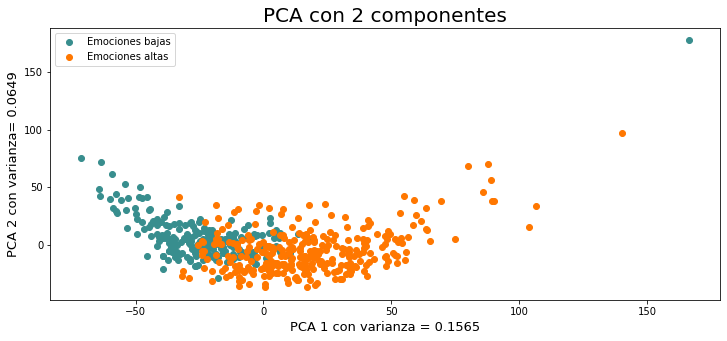

In [12]:
plt.figure(figsize=(12,5))
#plt.scatter(pca_transformado[:,0],pca_transformado[:,1],c=labels_data)
plt.scatter(pca_transformado[:bajas.shape[0],0],pca_transformado[:bajas.shape[0],1],label="Emociones bajas",c="#388E8E")
plt.scatter(pca_transformado[bajas.shape[0]:,0],pca_transformado[bajas.shape[0]:,1],label="Emociones altas",c="#ff7700")
plt.title("PCA con 2 componentes",fontsize=20)
plt.xlabel("PCA 1 con varianza = {}".format(round(pca_var[0],4)),fontsize=13)
plt.ylabel("PCA 2 con varianza= {}".format(round(pca_var[1],4)),fontsize=13)
plt.legend(loc="best")

## Linear Discriminant Analysis (LDA)

In [13]:
lda = LDA(n_components=1)
lda_transformada= lda.fit_transform(data,labels_data)
print(lda_transformada.shape)

(535, 1)


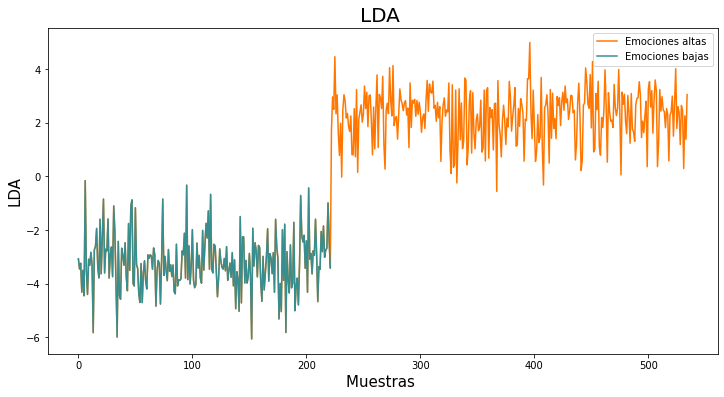

In [14]:
plt.figure(figsize=(12,6))
plt.plot(lda_transformada,c="#ff7700", label="Emociones altas")
plt.xlabel("Muestras ",fontsize=15)
plt.ylabel("LDA",fontsize=15)
plt.plot(lda_transformada[:bajas.shape[0]],c="#388E8E",label="Emociones bajas")
plt.title("LDA ",fontsize=20)
plt.legend(loc="best")
plt.show()


# Clasificación de datos 

## Clasificación por k nearest neighbor (KNN)

In [15]:
#División de los datos para entrenamiento y clasificación
#Adecuar los da datos para clasificacion
X_train, X_test, y_train, y_test = train_test_split(pca_transformado, labels_data, test_size=0.30)

#Normalizar y escalar los datos 
scaler.fit(X_train)# se calcula los vectores de media  y std

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
#Entrenamiendo por K vecinos más cercanos
classifier = KNeighborsClassifier(n_neighbors=5)

#Genero un mapa con los datos de entrenamiento(datos reales, junto con sus etiquetas)
classifier.fit(X_train, y_train) 

#Testear la data 
y_pred = classifier.predict(X_test)# Evaluo los datos x_test y retorno las etiquetas 

#Valores predichos para imprimir
x_low = X_test[np.where(y_pred == 0)]
x_high = X_test[np.where(y_pred == 1)]

#Valores originales para imprimir 
x_Tlow = X_test[np.where(y_test == 0)]
x_Thigh = X_test[np.where(y_test == 1)]

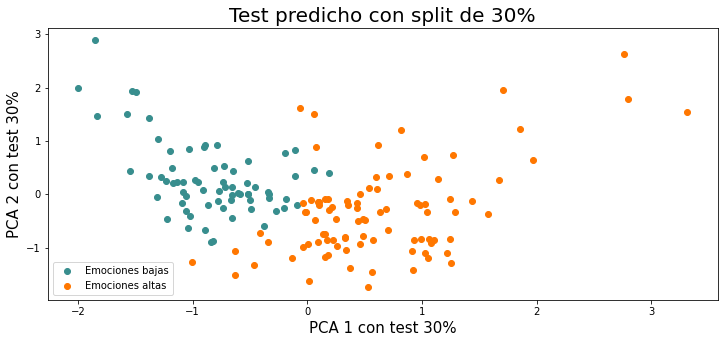

In [17]:
plt.figure(figsize=(12,5))
plt.scatter(x_low[:,0],x_low[:,1],c="#388E8E", label="Emociones bajas")
plt.scatter(x_high[:,0],x_high[:,1],c="#ff7700", label="Emociones altas")
plt.xlabel("PCA 1 con test 30%",fontsize=15)
plt.ylabel("PCA 2 con test 30%",fontsize=15)
plt.title("Test predicho con split de 30%",fontsize=20)
plt.legend()
plt.show()

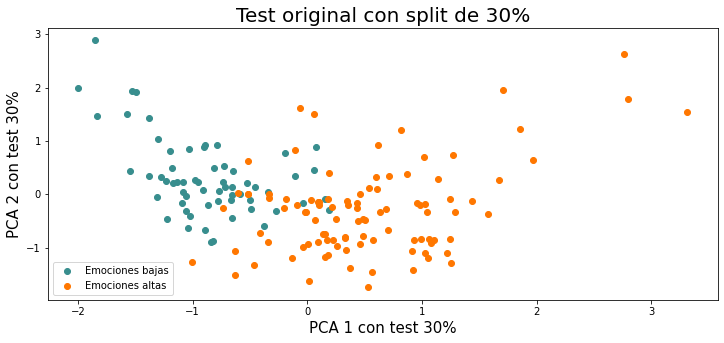

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(x_Tlow[:,0],x_Tlow[:,1],c="#388E8E", label="Emociones bajas")
plt.scatter(x_Thigh[:,0],x_Thigh[:,1],c="#ff7700", label="Emociones altas")
plt.xlabel("PCA 1 con test 30%",fontsize=15)
plt.ylabel("PCA 2 con test 30%",fontsize=15)
plt.title("Test original con split de 30%",fontsize=20)
plt.legend()
plt.show()

In [19]:
def specifity(Matriz):
    """
    La especificidad, por su parte, es la tasa de verdaderos negativos, (“true negative rate”) o TN. 
    Es la proporción entre los casos negativos bien clasificados por el modelo, respecto al total de negativos.
    """
    Especificidad = Matriz[0][0]/(Matriz[0][0]+Matriz[1][0])
    return Especificidad

In [20]:
#Matriz de confución
Matriz_confusion = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:", Matriz_confusion)
# Imprimir precision
Accuracy= accuracy_score(y_test,y_pred)
print("Accuracy: ",Accuracy)
# Recall, sensibilidad
Sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad: ", Sensibilidad)
#Precisión
Precision = precision_score(y_test, y_pred)
print("Precisión: ",Precision)
#Especificidad
Especificidad = specifity(Matriz_confusion)
print("Especificidad: ", Especificidad)

Matriz de confusión: [[58  4]
 [12 87]]
Accuracy:  0.9006211180124224
Sensibilidad:  0.8787878787878788
Precisión:  0.9560439560439561
Especificidad:  0.8285714285714286


## KNN usando validación cruzada  

In [21]:
#Numero de K-folds a usar
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(pca_transformado)

#Arrays para metricas  
Accuracy=np.array([])
Sensibilidad = np.array([])
Precision=np.array([])
Especificidad = np.array([])

for train_index, test_index in kf.split(pca_transformado):
    #Vector x (datos)
    X_train, X_test = pca_transformado[train_index], pca_transformado[test_index]
    
    #Vector Y (labels)
    y_train, y_test = labels_data[train_index], labels_data[test_index]

    scaler.fit(X_train)# se calcula los vectores de media  y std

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    #Clasificador KNN
    classifier = KNeighborsClassifier(n_neighbors=5) 
    
    #Genero un mapa con los datos de entrenamiento(datos reales, junto con sus etiquetas)
    classifier.fit(X_train, y_train) 

    #Testear la data 
    y_pred = classifier.predict(X_test)# Evaluo los datos x_test y retorno las etiquetas 
    
    Accuracy=np.append(Accuracy,accuracy_score(y_test,y_pred))
    Sensibilidad= np.append(Sensibilidad,recall_score(y_test, y_pred))
    Precision = np.append(Precision,precision_score(y_test, y_pred))
    Especificidad=np.append(Especificidad,specifity(confusion_matrix(y_test,y_pred)))

In [22]:
print("El promedio de accuracy: ",np.mean(Accuracy),",La desviación estandar: ",np.std(Accuracy))
print("El promedio de la sensibilidad: ",np.mean(Sensibilidad),",La desviación estandar: ",np.std(Sensibilidad))
print("El promedio de Precisión: ",np.mean(Precision),",La desviación estandar: ",np.std(Precision))
print("El promedio de Especificidad: ",np.mean(Especificidad),",La desviación estandar: ",np.std(Especificidad))

El promedio de accuracy:  0.8617400419287211 ,La desviación estandar:  0.03741909987870095
El promedio de la sensibilidad:  0.8698107138749929 ,La desviación estandar:  0.05794007390168867
El promedio de Precisión:  0.8943523009248816 ,La desviación estandar:  0.05738656054566744
El promedio de Especificidad:  0.8276055064098543 ,La desviación estandar:  0.06260181488771478


## KNN usando K-fold y Gridsearch

In [23]:
#Numero de K-folds a usar
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(pca_transformado)

#Arrays para metricas  
Accuracy=np.array([])
Sensibilidad = np.array([])
Precision=np.array([])
Especificidad = np.array([])

#Parametro de N vecinos cercanos para malla  de busqueda
parameter_KNN={"n_neighbors":[i for i in range(1,10)]} 

#Array para guardar los N
N=np.array([])

#Guardar lso scores
Scores_knn = np.array([]) # Score total 
y_Tpred_knn = np.array([]) #Total de predicciones

for train_index, test_index in kf.split(pca_transformado):
    #Vector x (datos)
    X_train, X_test = pca_transformado[train_index], pca_transformado[test_index]
    
    #Vector Y (labels)
    y_train, y_test = labels_data[train_index], labels_data[test_index]

    scaler.fit(X_train)# se calcula los vectores de media  y std

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Hago la malla de busqueda
    classifier = GridSearchCV(KNeighborsClassifier(), parameter_KNN)
    
    #Entrenar el modelo para poder encontrar mejor N para KNN
    classifier.fit(X_train, y_train)
    
    #Agregar los N a un array
    N= np.append(N,classifier.best_estimator_.n_neighbors)
    
    #Clasificador KNN
    classifier = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.n_neighbors) 
    
    #Genero un mapa con los datos de entrenamiento(datos reales, junto con sus etiquetas)
    classifier.fit(X_train, y_train) 

    #Testear la data 
    y_pred = classifier.predict(X_test)# Evaluo los datos x_test y retorno las etiquetas 
    
    Accuracy=np.append(Accuracy,accuracy_score(y_test,y_pred))
    Sensibilidad= np.append(Sensibilidad,recall_score(y_test, y_pred))
    Precision = np.append(Precision,precision_score(y_test, y_pred))
    Especificidad=np.append(Especificidad,specifity(confusion_matrix(y_test,y_pred)))
    
    #Scores
    Scores_knn = np.concatenate((Scores_knn,classifier.predict_proba(X_test)[:, 1]),axis=0)
    y_Tpred_knn = np.concatenate((y_Tpred_knn,y_test),axis=0)

In [24]:
print("El promedio de accuracy: ",np.mean(Accuracy),",La desviasión estandar: ",np.std(Accuracy))
print("El promedio de la sensibilidad: ",np.mean(Sensibilidad),",La desviasión estandar: ",np.std(Sensibilidad))
print("El promedio de Precisión: ",np.mean(Precision),",La desviasión estandar: ",np.std(Precision))
print("El promedio de Especificidad: ",np.mean(Especificidad),",La desviasión estandar: ",np.std(Especificidad))

El promedio de accuracy:  0.8617749825296995 ,La desviasión estandar:  0.033248400778188865
El promedio de la sensibilidad:  0.8537654744036018 ,La desviasión estandar:  0.06007740860420525
El promedio de Precisión:  0.9081096057642547 ,La desviasión estandar:  0.048230880174162445
El promedio de Especificidad:  0.8121237449362202 ,La desviasión estandar:  0.06302417895754141


In [25]:
print("El mejor N para cada fold es: ", N, "La moda es: ", st.mode(N))

El mejor N para cada fold es:  [9. 8. 8. 9. 9. 7. 7. 7. 9. 5.] La moda es:  ModeResult(mode=array([9.]), count=array([4]))


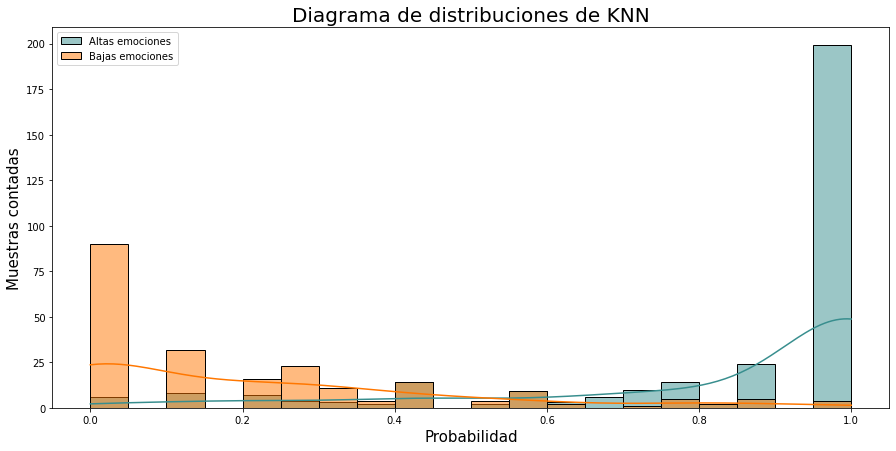

In [26]:
high_Scores_knn = Scores_knn[np.where(y_Tpred_knn==1)]
low_Scores_knn = Scores_knn[np.where(y_Tpred_knn==0)]

plt.figure(figsize=(15,7))
plt.title("Diagrama de distribuciones de KNN",fontsize=20)
sns.histplot(high_Scores_knn,bins=20,kde=True,label="Altas emociones",color="#388E8E")
sns.histplot(low_Scores_knn,bins=20,kde=True,label="Bajas emociones",color="#ff7700")
plt.ylabel("Muestras contadas",fontsize=15)
plt.xlabel("Probabilidad",fontsize=15)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

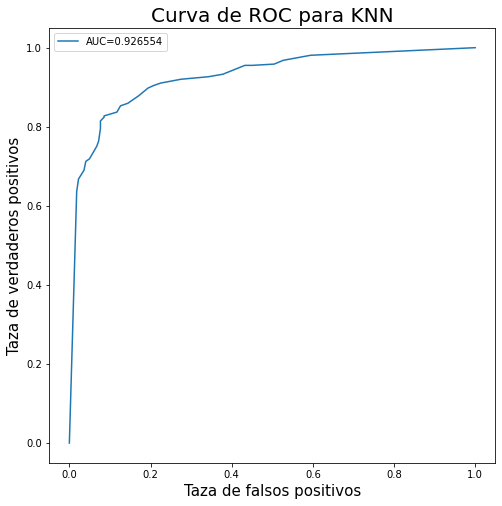

In [27]:
fp_knn,tp_knn,thresholds_knn = metrics.roc_curve(y_Tpred_knn,Scores_knn)
#Thresholds : Pocision donde se coloca el umbral
#print(thresholds)
auc_knn=metrics.auc(fp_knn,tp_knn)

#Gráfica
plt.figure(figsize=(8,8)) # la curva ROC siempre es cuadrada
plt.title("Curva de ROC para KNN",fontsize=20)
plt.xlabel("Taza de falsos positivos",fontsize=15)
plt.ylabel("Taza de verdaderos positivos",fontsize=15)
plt.plot(fp_knn,tp_knn, label="AUC={}".format(np.round(auc_knn,6)))
plt.legend()
plt.show

## Clasificación por support vector machine (SVM)

In [28]:
#División de los datos para entrenamiento y clasificación
#Adecuar los da datos para clasificacion
X_train, X_test, y_train, y_test = train_test_split(pca_transformado, labels_data, test_size=0.30)

#Normalizar y escalar los datos 
scaler.fit(X_train)# se calcula los vectores de media  y std

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# Crear SVM
classifier= svm.SVC(kernel='rbf') # Linear Kernel
#Buscar sobre parametro C en SVM 
#Entrenar el modelo
classifier.fit(X_train, y_train)

#predecir los datos para mi data
y_pred = classifier.predict(X_test)

#Valores predichos para imprimir
x_low_svm = X_test[np.where(y_pred == 0)]
x_high_svm = X_test[np.where(y_pred == 1)]

#Valores originales para imprimir 
x_Tlow_svm = X_test[np.where(y_test == 0)]
x_Thigh_svm = X_test[np.where(y_test == 1)]

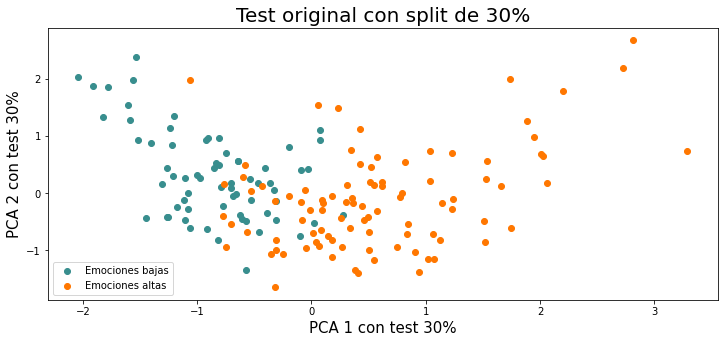

In [30]:
plt.figure(figsize=(12,5))
#plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.scatter(x_Tlow_svm[:,0],x_Tlow_svm[:,1],c="#388E8E", label="Emociones bajas")
plt.scatter(x_Thigh_svm[:,0],x_Thigh_svm[:,1],c="#ff7700", label="Emociones altas")
plt.xlabel("PCA 1 con test 30%",fontsize=15)
plt.ylabel("PCA 2 con test 30%",fontsize=15)
plt.title("Test original con split de 30%",fontsize=20)
plt.legend()
plt.show()

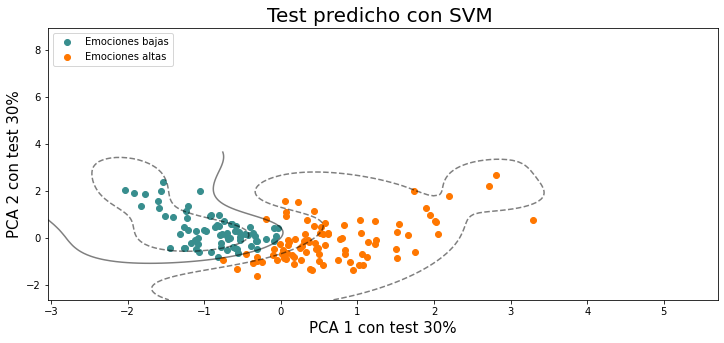

In [31]:
plt.figure(figsize=(12,5))
#plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.scatter(x_low_svm[:,0],x_low_svm[:,1],c="#388E8E", label="Emociones bajas")
plt.scatter(x_high_svm[:,0],x_high_svm[:,1],c="#ff7700", label="Emociones altas")
plt.xlabel("PCA 1 con test 30%",fontsize=15)
plt.ylabel("PCA 2 con test 30%",fontsize=15)
plt.title("Test predicho con SVM ",fontsize=20)
plt.legend()

# w = classifier.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-2.5, 2.5)
# yy = a * xx - (classifier.intercept_[0]) / w[1]
# Plot the hyperplane
#plt.plot(xx, yy)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_test,
    plot_method="contour",
    colors="k",
    levels=[-1, 0,1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    classifier.support_vectors_[:, 0],
    classifier.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="none",
)

plt.show()

In [32]:
#Matriz de confución
Matriz_confusion = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:", Matriz_confusion)
# Imprimir precision
Accuracy= accuracy_score(y_test,y_pred)
print("Accuracy: ",Accuracy)
# Recall, sensibilidad
Sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad: ", Sensibilidad)
#Precisión
Precision = precision_score(y_test, y_pred)
print("Precisión: ",Precision)
#Especificidad
Especificidad = specifity(Matriz_confusion)
print("Especificidad: ", Especificidad)

Matriz de confusión: [[59  8]
 [13 81]]
Accuracy:  0.8695652173913043
Sensibilidad:  0.8617021276595744
Precisión:  0.9101123595505618
Especificidad:  0.8194444444444444


### SVM usando K-folds

In [33]:
#Numero de K-folds a usar
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(pca_transformado)

# Arrays para metricas
Accuracy=np.array([])
Sensibilidad = np.array([])
Precision=np.array([])
Especificidad = np.array([])

for train_index, test_index in kf.split(pca_transformado):
    #Vector x (datos)
    X_train, X_test = pca_transformado[train_index], pca_transformado[test_index]
    
    #Vector Y (labels)
    y_train, y_test = labels_data[train_index], labels_data[test_index]

    scaler.fit(X_train)# se calcula los vectores de media  y std

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Crear SVM
    classifier= svm.SVC(kernel='rbf') # Linear Kernel

    #Entrenar el modelo
    classifier.fit(X_train, y_train)

    #predecir los datos para mi data
    y_pred = classifier.predict(X_test)
    
    #Llenar métricas 
    Accuracy=np.append(Accuracy,accuracy_score(y_test,y_pred))
    Sensibilidad= np.append(Sensibilidad,recall_score(y_test, y_pred))
    Precision = np.append(Precision,precision_score(y_test, y_pred))
    Especificidad=np.append(Especificidad,specifity(confusion_matrix(y_test,y_pred)))
    
    #

In [34]:
print("El promedio de accuracy: ",np.mean(Accuracy),",La desviación estandar: ",np.std(Accuracy))
print("El promedio de la sensibilidad: ",np.mean(Sensibilidad),",La desviación estandar: ",np.std(Sensibilidad))
print("El promedio de Precisión: ",np.mean(Precision),",La desviación estandar: ",np.std(Precision))
print("El promedio de Especificidad: ",np.mean(Especificidad),",La desviación estandar: ",np.std(Especificidad))

El promedio de accuracy:  0.8727812718378756 ,La desviación estandar:  0.05732589945189802
El promedio de la sensibilidad:  0.8738481725790358 ,La desviación estandar:  0.07464300030155048
El promedio de Precisión:  0.9022105821965143 ,La desviación estandar:  0.062149745640298466
El promedio de Especificidad:  0.839579443947865 ,La desviación estandar:  0.085925218960614


## SVM usando Gridsearch y K-fold

In [35]:
#Numero de K-folds a usar
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(pca_transformado)

# Arrays para metricas
Accuracy=np.array([])
Sensibilidad = np.array([])
Precision=np.array([])
Especificidad = np.array([])

#Parametros para evaluar en la malla de busqueda
parameter_svm={"C":[0.0001,.001, 0.01, 0.1, 1, 10, 100],"gamma":[0.0001,.001, 0.01, 0.1, 1, 10, 100]}

#Arrays para guardar parametros en cada fold
C=np.array([])
gamma=np.array([])

#Guardar lso scores
Scores = np.array([]) # Score total 
y_Tpred = np.array([]) #Total de predicciones

for train_index, test_index in kf.split(pca_transformado):
    #Vector x (datos)
    X_train, X_test = pca_transformado[train_index], pca_transformado[test_index]
    
    #Vector Y (labels)
    y_train, y_test = labels_data[train_index], labels_data[test_index]

    scaler.fit(X_train)# se calcula los vectores de media  y std

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Hago la malla de busqueda
    classifier = GridSearchCV(svm.SVC(kernel='rbf'), parameter_svm)
    
    #Entrenar el modelo para poder encontrar mejor C y Gamma
    classifier.fit(X_train, y_train)

    #Llenar parametros C y gamma para cada fold
    C=np.append(C,classifier.best_estimator_.C)
    gamma=np.append(gamma,classifier.best_estimator_.gamma)
    
    #Generar SVM con C y gamma de la mmala de busqueda 
    classifier= svm.SVC(kernel='rbf',C=classifier.best_estimator_.C,gamma=classifier.best_estimator_.gamma) 
    
    #Entrenar el modelo
    classifier.fit(X_train, y_train)

    #predecir los datos para mi data
    y_pred = classifier.predict(X_test)

    #Llenar métricas 
    Accuracy=np.append(Accuracy,accuracy_score(y_test,y_pred))
    Sensibilidad= np.append(Sensibilidad,recall_score(y_test, y_pred))
    Precision = np.append(Precision,precision_score(y_test, y_pred))
    Especificidad=np.append(Especificidad,specifity(confusion_matrix(y_test,y_pred)))
    
    #Scores
    Scores = np.concatenate((Scores,classifier.decision_function(X_test)),axis=0)
    y_Tpred = np.concatenate((y_Tpred,y_test),axis=0)

In [36]:
print("El promedio de accuracy: ",np.mean(Accuracy),",La desviación estandar: ",np.std(Accuracy))
print("El promedio de la sensibilidad: ",np.mean(Sensibilidad),",La desviación estandar: ",np.std(Sensibilidad))
print("El promedio de Precisión: ",np.mean(Precision),",La desviación estandar: ",np.std(Precision))
print("El promedio de Especificidad: ",np.mean(Especificidad),",La desviación estandar: ",np.std(Especificidad))

El promedio de accuracy:  0.8689028651292802 ,La desviación estandar:  0.0514673510562656
El promedio de la sensibilidad:  0.8714139384708645 ,La desviación estandar:  0.05524241327988556
El promedio de Precisión:  0.9080905551767622 ,La desviación estandar:  0.057240590542618736
El promedio de Especificidad:  0.8183129227510786 ,La desviación estandar:  0.08662657539961724


In [37]:
print("El vector de los valores C para cada fold:",C, ", La moda es: ", st.mode(C))
print("El vector de los valores gamma para cada fold:",gamma," La moda es: ", st.mode(gamma))

El vector de los valores C para cada fold: [  1.    1.  100.    1.  100.  100.  100.    0.1 100.  100. ] , La moda es:  ModeResult(mode=array([100.]), count=array([6]))
El vector de los valores gamma para cada fold: [1.  1.  1.  1.  1.  1.  1.  1.  0.1 1. ]  La moda es:  ModeResult(mode=array([1.]), count=array([9]))


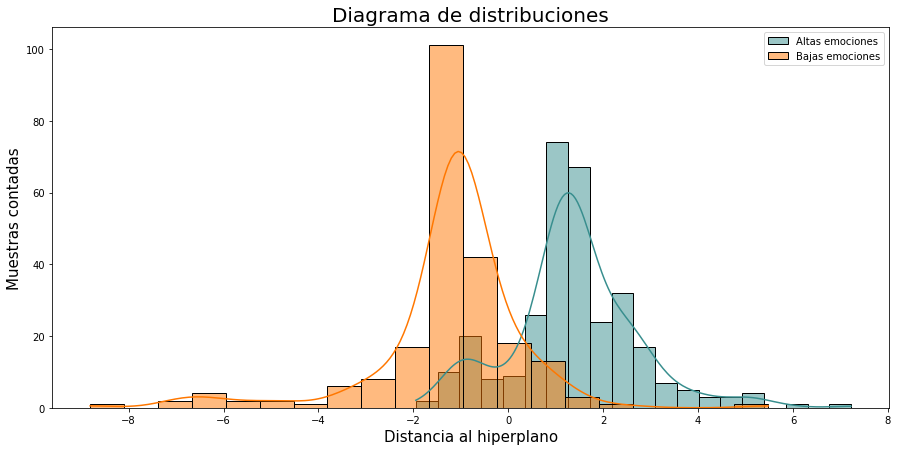

In [39]:
high_Scores = Scores[np.where(y_Tpred==1)]
low_Scores= Scores[np.where(y_Tpred==0)]

plt.figure(figsize=(15,7))
plt.title("Diagrama de distribuciones",fontsize=20)
plt.xlabel("Distancia al hiperplano",fontsize=15)
plt.ylabel("Muestras contadas",fontsize=15)
sns.histplot(high_Scores,bins=20,kde=True,label="Altas emociones",color="#388E8E")
sns.histplot(low_Scores,bins=20,kde=True,label="Bajas emociones",color="#ff7700")
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

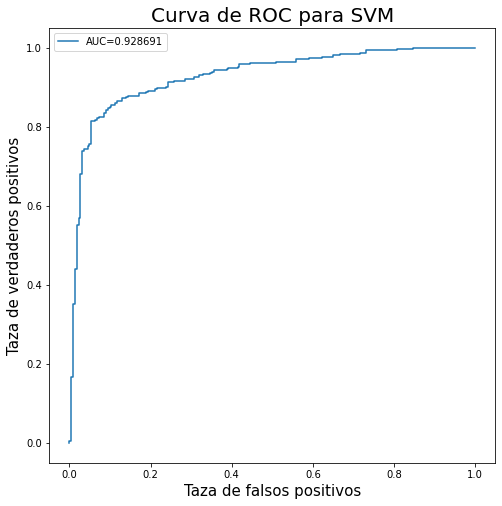

In [40]:
fp,tp,thresholds = metrics.roc_curve(y_Tpred,Scores)
#Thresholds : Pocision donde se coloca el umbral
auc=metrics.auc(fp,tp)

#Gráfica
plt.figure(figsize=(8,8)) # la curva ROC siempre es cuadrada
plt.title("Curva de ROC para SVM",fontsize=20)
plt.xlabel("Taza de falsos positivos",fontsize=15)
plt.ylabel("Taza de verdaderos positivos",fontsize=15)
plt.plot(fp,tp, label="AUC={}".format(np.round(auc,6)))
plt.legend()
plt.show